In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:

base_model = MobileNetV2(weights='imagenet', include_top=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_6816\3953100651.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [3]:

x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(128, activation='relu')(x)  
predictions = Dense(22, activation='softmax')(x)  # 22 sınıflı bir problem için çıkış katmanı

In [4]:

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(128, activation='relu')(x) 
predictions = Dense(22, activation='softmax')(x)  # 22 sınıflı bir problem için çıkış katmanı,
#softmax çok sınıflı sınıflandırma problemlerşinde klullanılır

In [5]:
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# Özellik çıkarıcı katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#loss='categorical_crossentropy' Modelin tahmin ettiği olasılık dağılımı ile gerçek etiketlerin dağılımı arasındaki farkı ölçer.
#optimizer='adam' Adam, stokastik gradyan iniş algoritmasının bir türevidir ve öğrenme oranını dinamik olarak ayarlar.

In [7]:
# Veri artırma
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_path = "C:/Users/HP/Desktop/bitirme projesi/bitirme_bitki_hastaligi/kod_dosyalari/veri_setleri/tekrardan_bolunmus_hali/train"
validation_path = "C:/Users/HP/Desktop/bitirme projesi/bitirme_bitki_hastaligi/kod_dosyalari/veri_setleri/tekrardan_bolunmus_hali/val"
test_path = "C:/Users/HP/Desktop/bitirme projesi/bitirme_bitki_hastaligi/kod_dosyalari/veri_setleri/tekrardan_bolunmus_hali/test"

In [9]:
# Veri setini yükleme
train_generator = train_datagen.flow_from_directory(train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3134 images belonging to 22 classes.


In [10]:
validation_generator = validation_datagen.flow_from_directory(validation_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 439 images belonging to 22 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 921 images belonging to 22 classes.


In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [13]:
# Modeli eğitme
model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 626s 6s/step - accuracy: 0.4308 - loss: 1.9429 - val_accuracy: 0.7275 - val_loss: 0.7838
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 610s 6s/step - accuracy: 0.7869 - loss: 0.6963 - val_accuracy: 0.8198 - val_loss: 0.5738
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 589s 6s/step - accuracy: 0.8254 - loss: 0.5268 - val_accuracy: 0.8328 - val_loss: 0.4855
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 616s 6s/step - accuracy: 0.8534 - loss: 0.4262 - val_accuracy: 0.8643 - val_loss: 0.4299
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 573s 6s/step - accuracy: 0.8883 - loss: 0.3260 - val_accuracy: 0.8523 - val_loss: 0.4338


In [34]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Doğrulama setindeki tahminler
val_predictions = model.predict(validation_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step


In [31]:
# Doğrulama setindeki gerçek etiketler
val_true_classes = validation_generator.classes
val_true_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [32]:
# Sınıf isimleri
class_labels = list(validation_generator.class_indices.keys())

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(val_true_classes, val_predicted_classes)

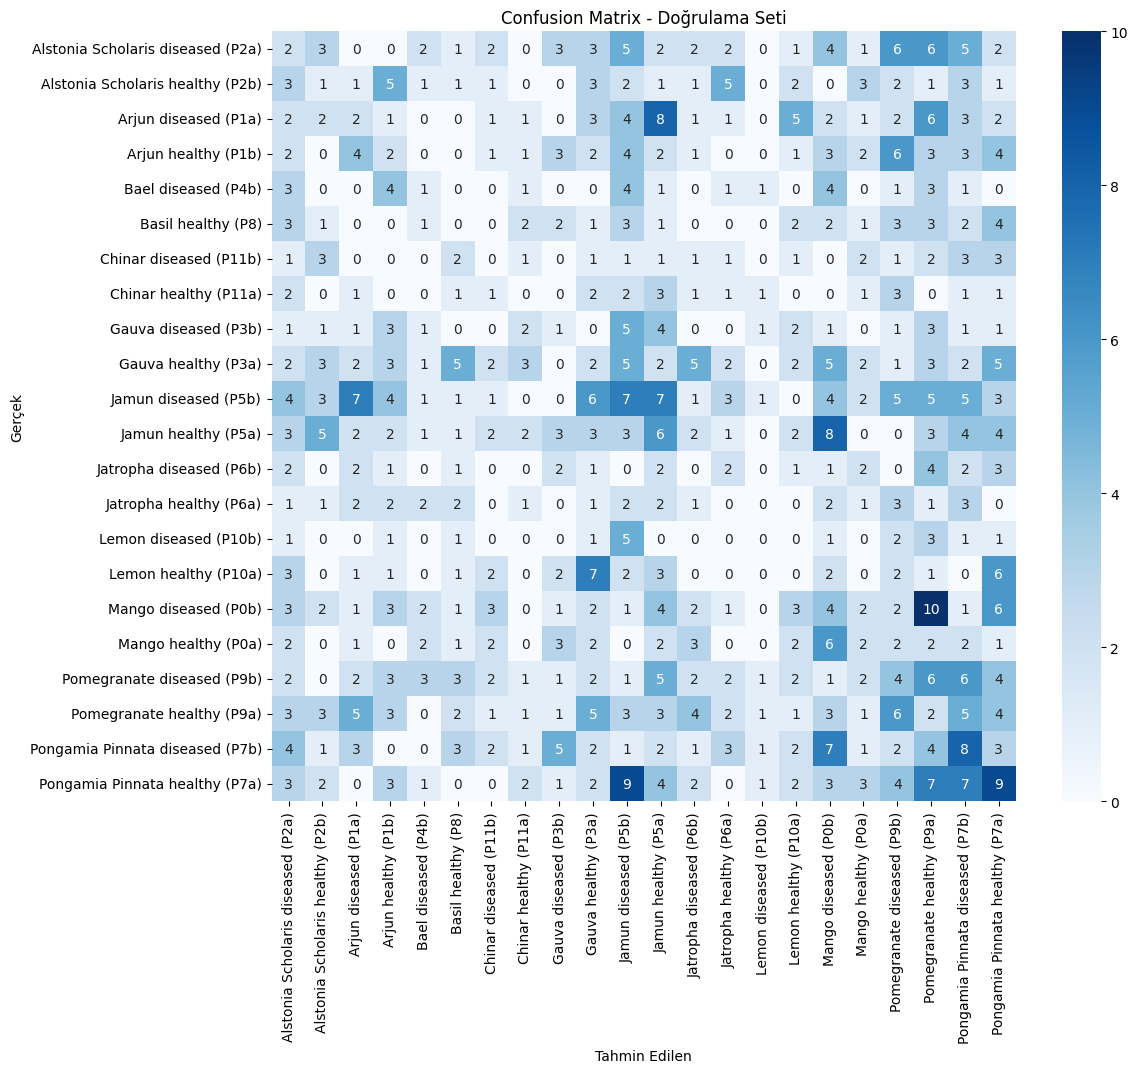

In [36]:
# Görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix - Doğrulama Seti')
plt.show()

In [37]:

print("Doğrulama Seti için Classification Report:")
print(classification_report(val_true_classes, val_predicted_classes, target_names=class_labels))


Doğrulama Seti için Classification Report:
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.04      0.04      0.04        52
 Alstonia Scholaris healthy (P2b)       0.03      0.03      0.03        37
             Arjun diseased (P1a)       0.05      0.04      0.05        47
              Arjun healthy (P1b)       0.05      0.05      0.05        44
              Bael diseased (P4b)       0.05      0.04      0.05        25
               Basil healthy (P8)       0.00      0.00      0.00        31
           Chinar diseased (P11b)       0.00      0.00      0.00        24
            Chinar healthy (P11a)       0.00      0.00      0.00        21
             Gauva diseased (P3b)       0.04      0.03      0.04        29
              Gauva healthy (P3a)       0.04      0.04      0.04        57
             Jamun diseased (P5b)       0.10      0.10      0.10        70
              Jamun healthy (P5a)       0.09      0.11  

In [38]:
# Test setini ölçeklendirmek için bir ImageDataGenerator oluşturma
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [39]:
# Test setini yükleme
test_generator = test_datagen.flow_from_directory(
    test_path,  # Test verilerinizin bulunduğu dizin
    target_size=(224, 224),  # Modelinize uygun resim boyutu
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Tahminlerin sırasını korumak için shuffle=False
)

Found 921 images belonging to 22 classes.


In [40]:
# Test setindeki tahminler
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step


In [41]:
# Test setindeki gerçek etiketler
test_true_classes = test_generator.classes

In [42]:
# Test setindeki sınıf isimlerini alalım
class_labels = list(test_generator.class_indices.keys())

In [43]:
# Classification Report ve Confusion Matrix
print("Test Seti için Classification Report:")
print(classification_report(test_true_classes, test_predicted_classes, target_names=class_labels))

Test Seti için Classification Report:
                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       0.92      0.92      0.92        52
 Alstonia Scholaris healthy (P2b)       0.81      0.68      0.74        37
             Arjun diseased (P1a)       0.97      0.77      0.86        47
              Arjun healthy (P1b)       0.83      0.77      0.80        44
              Bael diseased (P4b)       1.00      0.76      0.86        25
               Basil healthy (P8)       1.00      0.87      0.93        31
           Chinar diseased (P11b)       0.87      0.83      0.85        24
            Chinar healthy (P11a)       0.84      0.76      0.80        21
             Gauva diseased (P3b)       0.86      0.83      0.84        29
              Gauva healthy (P3a)       0.94      0.84      0.89        57
             Jamun diseased (P5b)       0.90      0.89      0.89        70
              Jamun healthy (P5a)       0.80      0.91      0

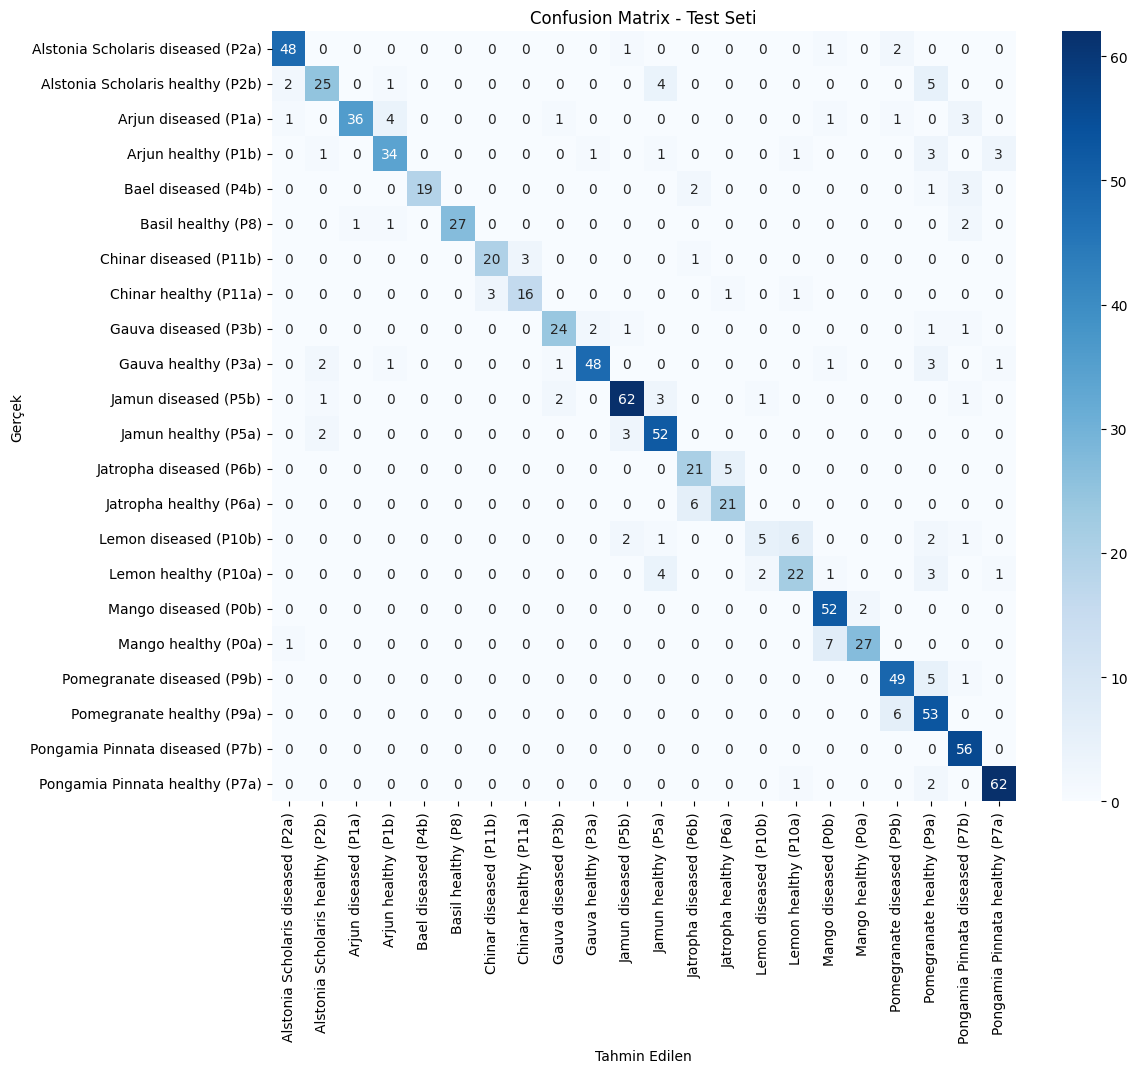

In [44]:
conf_matrix_test = confusion_matrix(test_true_classes, test_predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix - Test Seti')
plt.show()

In [17]:
from tensorflow.keras.layers import Dropout


In [18]:
# Yeni sınıflandırıcı ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Özelliklerin ortalamasını alır
x = Dense(128, activation='relu')(x)  # Ek bir tam bağlı katman
x = Dropout(0.5)(x)  # Dropout oranını ayarlayın
predictions = Dense(22, activation='softmax')(x)  # 22 sınıflı bir problem için çıkış katmanı

In [19]:
model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [24]:
# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 638s 6s/step - accuracy: 0.2594 - loss: 2.5546 - val_accuracy: 0.7079 - val_loss: 1.1302
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 590s 6s/step - accuracy: 0.5531 - loss: 1.3805 - val_accuracy: 0.7557 - val_loss: 0.8108
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 573s 6s/step - accuracy: 0.6562 - loss: 1.0757 - val_accuracy: 0.7991 - val_loss: 0.6540
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 581s 6s/step - accuracy: 0.6889 - loss: 0.9448 - val_accuracy: 0.8350 - val_loss: 0.5446
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 573s 6s/step - accuracy: 0.7333 - loss: 0.8090 - val_accuracy: 0.8458 - val_loss: 0.5082


In [29]:
# Test verisini değerlendirme
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.8258 - loss: 0.5861
Test Loss: 0.5081554651260376
Test Accuracy: 0.8458197712898254
